# Task 5 - Model Training and Tracking

In [1]:
# Install required packages
import pandas as pd
import mlflow
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

## module calling 

In [2]:
# Add the parent directory to the system path
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.train import ModelTrainer

## loading of Transformed data in Task-4

In [3]:

# Load transformed data
data = pd.read_csv('F:/Credit-Risk-Model/data/processed/Transformedfinal_data.csv')


## Check for Variable distribution

In [4]:
# Check target variable distribution
print("Target variable distribution:")
print(data['is_high_risk'].value_counts(normalize=True))

Target variable distribution:
is_high_risk
0.0    0.617317
1.0    0.382683
Name: proportion, dtype: float64


In [5]:
# Check for RFM columns
print("Columns in dataset:", data.columns.tolist())

Columns in dataset: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'Amount', 'Value', 'PricingStrategy', 'total_amount_x', 'avg_amount_x', 'trans_count_x', 'std_amount_x', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'total_amount_y', 'avg_amount_y', 'trans_count_y', 'std_amount_y', 'FraudResult', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'is_high_risk']


In [8]:
# Drop rows where the target column is NaN
data = data.dropna(subset=['is_high_risk'])

## Model initialization

In [9]:
#Initialize ModelTrainer
trainer = ModelTrainer()


## spliting of Dataset

In [10]:

# Split data
X_train, X_test, y_train, y_test = trainer.split_data(data, target_col='is_high_risk')

# Check test set
print(f"Test set size: {len(y_test)}, Positive cases: {sum(y_test)}")

Test set size: 1123, Positive cases: 430.0


# Training and HyperParameter Tuning

In [11]:
# Train and tune models
results = trainer.train_and_tune(X_train, y_train, X_test, y_test, experiment_name="CreditRiskExperiment")

2025/07/04 18:23:17 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/07/04 18:24:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

RandomForest Metrics: {'accuracy': 0.5031166518254675, 'precision': 0.372, 'recall': 0.4325581395348837, 'f1': 0.4, 'roc_auc': np.float64(0.4938823450451358)}
RandomForest Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


2025/07/04 18:29:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


GradientBoosting Metrics: {'accuracy': 0.4541406945681211, 'precision': 0.36281859070464767, 'recall': 0.5627906976744186, 'f1': 0.4412032816773017, 'roc_auc': np.float64(0.48536528071411794)}
GradientBoosting Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


Successfully registered model 'GradientBoosting'.
Created version '1' of model 'GradientBoosting'.


## Visualization of Models 

In [12]:
# Visualize results
metrics_df = pd.DataFrame({
    model_name: result['metrics'] for model_name, result in results.items()
}).T
print("Model Performance Metrics:")
print(metrics_df)

Model Performance Metrics:
                  accuracy  precision    recall        f1   roc_auc
RandomForest      0.503117   0.372000  0.432558  0.400000  0.493882
GradientBoosting  0.454141   0.362819  0.562791  0.441203  0.485365


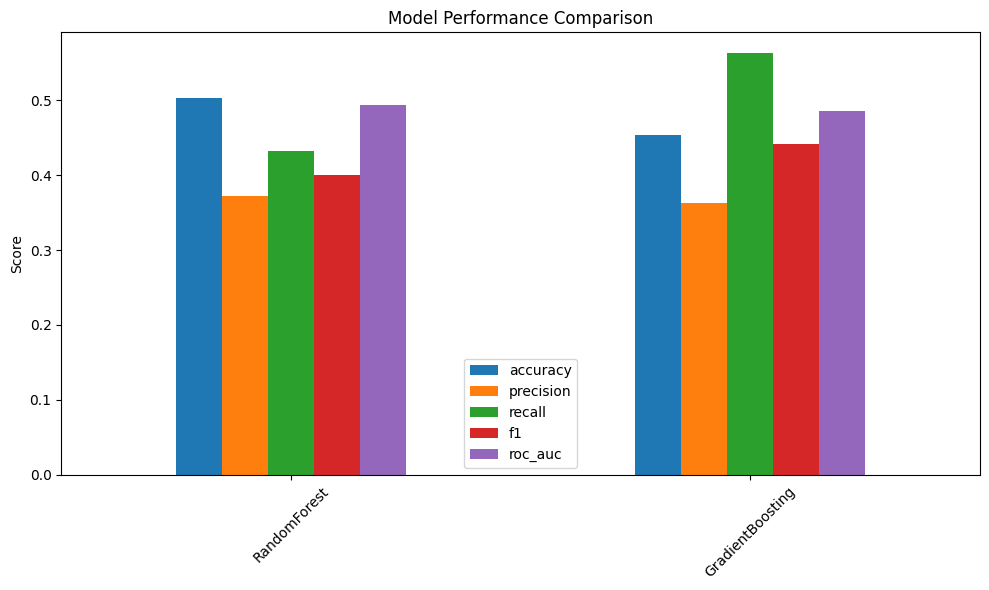

In [14]:

# Plot metrics
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('F:/Credit-Risk-Model/data/model_performance.png')
plt.show()



# keeping Best Model For prediction 

In [15]:
# Register best model
if trainer.best_model:
    with mlflow.start_run(run_name=f"Best_Model_{trainer.best_model_name}"):
        input_example = X_train.head(1)
        mlflow.sklearn.log_model(
            sk_model=trainer.best_model,
            artifact_path=trainer.best_model_name,
            registered_model_name=trainer.best_model_name,
            input_example=input_example
        )
        run_id = mlflow.active_run().info.run_id
        trainer.register_best_model(trainer.best_model_name, trainer.best_model, run_id)

2025/07/04 18:53:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'GradientBoosting' already exists. Creating a new version of this model...
Created version '2' of model 'GradientBoosting'.
Registered model 'GradientBoosting' already exists. Creating a new version of this model...
2025/07/04 18:53:58 WARNING mlflow.tracking._model_registry.fluent: Run with id 2828c2eb422740d386fc5acbb797021d has no artifacts at artifact path 'GradientBoosting', registering model based on models:/m-2d39dbc46af6452998fc20e77979509d instead


Registered GradientBoosting in MLflow Model Registry


Created version '3' of model 'GradientBoosting'.
